<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(0__4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0-4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n30-4.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.557885,36.190450,76.385281,1.153557,162.287174,161.131195,1.155979
1,0.0,1.0,58.190050,51.637326,55.257372,-2.373410,172.711338,175.086852,-2.375513
2,0.0,2.0,97.165167,35.182107,26.926808,-0.087220,169.186862,169.136325,0.050537
3,0.0,3.0,40.124966,22.211379,70.036990,-0.339428,142.033908,142.281100,-0.247193
4,0.0,4.0,87.334460,59.722009,59.733722,0.077565,216.867755,216.898861,-0.031107
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,84.302710,68.687000,54.330015,2.511087,219.830813,217.503491,2.327321
29996,999.0,26.0,21.809600,60.069007,76.650314,-1.222839,167.306081,168.528939,-1.222858
29997,999.0,27.0,28.573476,85.356866,49.274165,1.676026,174.880533,173.499493,1.381040
29998,999.0,28.0,64.380220,64.454498,29.514238,0.575680,168.924636,168.583904,0.340732


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    38.557885  36.190450  76.385281  ...  162.287174  161.131195  1.155979
      1.0    58.190050  51.637326  55.257372  ...  172.711338  175.086852 -2.375513
      2.0    97.165167  35.182107  26.926808  ...  169.186862  169.136325  0.050537
      3.0    40.124966  22.211379  70.036990  ...  142.033908  142.281100 -0.247193
      4.0    87.334460  59.722009  59.733722  ...  216.867755  216.898861 -0.031107
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   84.302710  68.687000  54.330015  ...  219.830813  217.503491  2.327321
      26.0   21.809600  60.069007  76.650314  ...  167.306081  168.528939 -1.222858
      27.0   28.573476  85.356866  49.274165  ...  174.880533  173.499493  1.381040
      28.0   64.380220  64.454498  29.514238  ...  168.924636  168.583904  0.340732
      29.0   62.798537  91.752569  98.500563  ...  262.395454  263.227289 -0.831834

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    38.557885  36.190450  76.385281  ...  162.287174  161.131195  1.155979
      1.0    58.190050  51.637326  55.257372  ...  172.711338  175.086852 -2.375513
      2.0    97.165167  35.182107  26.926808  ...  169.186862  169.136325  0.050537
      3.0    40.124966  22.211379  70.036990  ...  142.033908  142.281100 -0.247193
      4.0    87.334460  59.722009  59.733722  ...  216.867755  216.898861 -0.031107
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   84.302710  68.687000  54.330015  ...  219.830813  217.503491  2.327321
      26.0   21.809600  60.069007  76.650314  ...  167.306081  168.528939 -1.222858
      27.0   28.573476  85.356866  49.274165  ...  174.880533  173.499493  1.381040
      28.0   64.380220  64.454498  29.514238  ...  168.924636  168.583904  0.340732
      29.0   62.798537  91.752569  98.500563  ...  262.395454  263.227289 -0.831834

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.557885,36.190450,76.385281,1.153557,162.287174,161.131195,1.155979
1,0.0,1.0,58.190050,51.637326,55.257372,-2.373410,172.711338,175.086852,-2.375513
2,0.0,2.0,97.165167,35.182107,26.926808,-0.087220,169.186862,169.136325,0.050537
3,0.0,3.0,40.124966,22.211379,70.036990,-0.339428,142.033908,142.281100,-0.247193
4,0.0,4.0,87.334460,59.722009,59.733722,0.077565,216.867755,216.898861,-0.031107
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,84.302710,68.687000,54.330015,2.511087,219.830813,217.503491,2.327321
29996,999.0,26.0,21.809600,60.069007,76.650314,-1.222839,167.306081,168.528939,-1.222858
29997,999.0,27.0,28.573476,85.356866,49.274165,1.676026,174.880533,173.499493,1.381040
29998,999.0,28.0,64.380220,64.454498,29.514238,0.575680,168.924636,168.583904,0.340732


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    38.557885  36.190450  76.385281  ...  162.287174  161.131195  1.155979
      1.0    58.190050  51.637326  55.257372  ...  172.711338  175.086852 -2.375513
      2.0    97.165167  35.182107  26.926808  ...  169.186862  169.136325  0.050537
      3.0    40.124966  22.211379  70.036990  ...  142.033908  142.281100 -0.247193
      4.0    87.334460  59.722009  59.733722  ...  216.867755  216.898861 -0.031107
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   84.302710  68.687000  54.330015  ...  219.830813  217.503491  2.327321
      26.0   21.809600  60.069007  76.650314  ...  167.306081  168.528939 -1.222858
      27.0   28.573476  85.356866  49.274165  ...  174.880533  173.499493  1.381040
      28.0   64.380220  64.454498  29.514238  ...  168.924636  168.583904  0.340732
      29.0   62.798537  91.752569  98.500563  ...  262.395454  263.227289 -0.831834

[30000 rows x 7 columns]

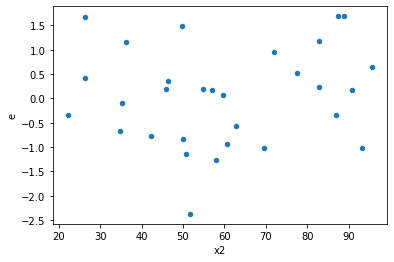

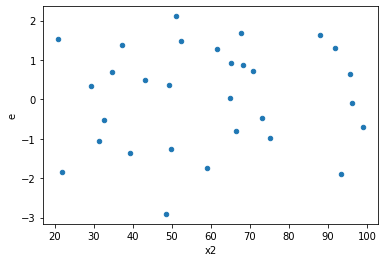

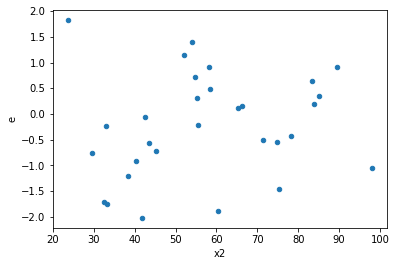

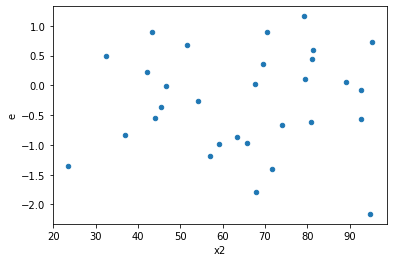

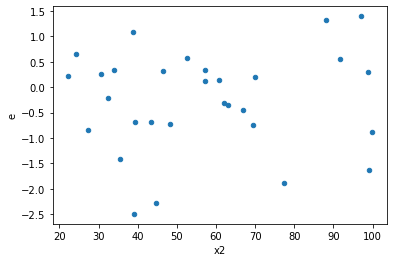

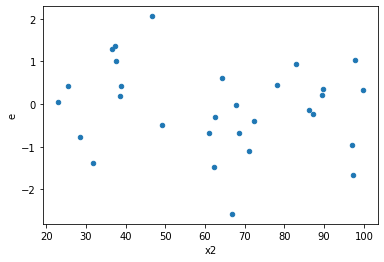

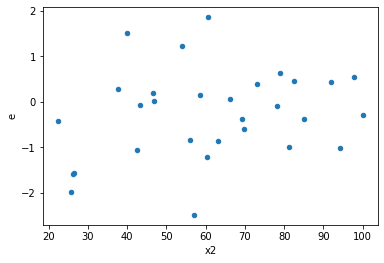

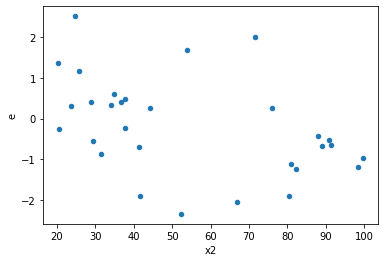

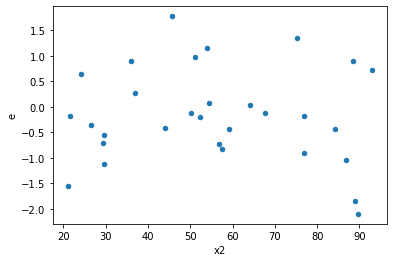

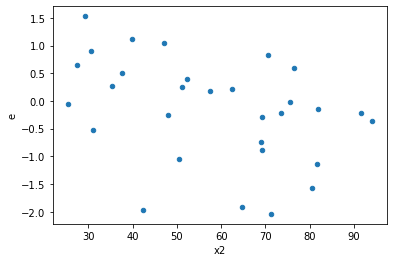

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,14.0,10.0,22.12786073686849,20.25938067766707,1.5805614812048923,2.025938067766707,1.2817837786495312,0.7047378753563991,0.6476310623218005,0.35236893767819955,Reject001=1 : Homoscedasticity
3.0,10.0,14.0,6.791915201903119,12.740364181459832,0.6791915201903118,0.9100260129614165,1.339866570634486,0.5994005175179513,0.7002997412410243,0.29970025875897566,Reject001=1 : Homoscedasticity
5.0,9.0,15.0,5.655194837342438,17.61554222828954,0.6283549819269375,1.1743694818859693,1.8689586550019908,0.27318006072002565,0.8634099696399872,0.13659003036001283,Reject001=1 : Homoscedasticity
6.0,13.0,11.0,12.695119014809434,11.129422853079742,0.9765476165238026,1.01176571391634,1.0360638813680203,0.9652362390724907,0.5173818804637547,0.48261811953624534,Reject001=1 : Homoscedasticity
7.0,13.0,11.0,10.26316096297969,18.768635168349366,0.7894739202292069,1.7062395607590333,2.161236130844782,0.20830613145164767,0.8958469342741762,0.10415306572582383,Reject001=1 : Homoscedasticity
10.0,14.0,10.0,7.104377987832723,7.281531448276835,0.5074555705594802,0.7281531448276836,1.4349101420344637,0.5730790262411731,0.7134604868794134,0.28653951312058656,Reject001=1 : Homoscedasticity
11.0,18.0,6.0,11.429896540171297,5.330498516447454,0.6349942522317388,0.888416419407909,1.3990936394864955,0.7147900595559589,0.6426049702220206,0.35739502977797943,Reject001=1 : Homoscedasticity
12.0,11.0,13.0,5.090341374399562,9.963639606623634,0.4627583067635965,0.7664338158941256,1.6562291906856335,0.3839434840961573,0.8080282579519213,0.19197174204807865,Reject001=1 : Homoscedasticity
13.0,9.0,15.0,4.029644999393117,9.012155478625104,0.4477383332659019,0.6008103652416736,1.3418783262519218,0.5905109672983013,0.7047445163508493,0.29525548364915066,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,15.0,9.030682336142682,14.24652239398942,1.003409148460298,0.9497681595992946,0.9465412599204283,0.9683183980284749,Reject001=1 : Homoscedasticity
1.0,14.0,10.0,22.12786073686849,20.25938067766707,1.5805614812048923,2.025938067766707,1.2817837786495312,0.7047378753563991,Reject001=1 : Homoscedasticity
2.0,15.0,9.0,18.733357488510464,7.605317094405264,1.2488904992340308,0.845035232711696,0.6766287622733721,0.4838996960649359,Reject001=1 : Homoscedasticity
3.0,10.0,14.0,6.791915201903119,12.740364181459832,0.6791915201903118,0.9100260129614165,1.339866570634486,0.5994005175179513,Reject001=1 : Homoscedasticity
4.0,8.0,16.0,10.874846884911351,13.645043219515598,1.3593558606139189,0.8528152012197249,0.6273671419892745,0.5126131084950843,Reject001=1 : Homoscedasticity
5.0,9.0,15.0,5.655194837342438,17.61554222828954,0.6283549819269375,1.1743694818859693,1.8689586550019908,0.27318006072002565,Reject001=1 : Homoscedasticity
6.0,13.0,11.0,12.695119014809434,11.129422853079742,0.9765476165238026,1.01176571391634,1.0360638813680203,0.9652362390724907,Reject001=1 : Homoscedasticity
7.0,13.0,11.0,10.26316096297969,18.768635168349366,0.7894739202292069,1.7062395607590333,2.161236130844782,0.20830613145164767,Reject001=1 : Homoscedasticity
8.0,8.0,16.0,7.104567822930112,12.831296539230424,0.888070977866264,0.8019560337019015,0.9030314622247112,0.9257667906834101,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      983
Reject001=0 : Heteroscedasticity     17
Name: Result_test, dtype: int64